<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

# Sentiment Analysis on Imdb Movie Reviews

* References:

[https://towardsdatascience.com/how-to-build-a-neural-network-with-keras-e8faa33d0ae4](https://towardsdatascience.com/how-to-build-a-neural-network-with-keras-e8faa33d0ae4)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/learning-stack/Colab-ML-Playbook/blob/master/Sentiment%20Analysis%20on%20Imdb/Neural%20Network%20with%20Keras.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/learning-stack/Colab-ML-Playbook/blob/master/Sentiment%20Analysis%20on%20Imdb/Neural%20Network%20with%20Keras.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer.csv to breast_cancer.csv


In [0]:
#Save uploaded file on the Virtual Machine's 
#Thanks to user3800642 from StackOverflow 

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
name=fn, length=len(uploaded[fn])))

User uploaded file "breast_cancer.csv" with length 125203 bytes


In [0]:
!ls

breast_cancer.csv  sample_data


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing dataset
dataset = pd.read_csv('breast_cancer.csv')

In [0]:
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
#Seperating dependent and independent variables. 

X = dataset.iloc[:, 2:32].values  #Note: Exclude Last column with all NaN values.
y = dataset.iloc[:, 1].values

In [0]:
X.shape

(569, 30)

In [0]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y)

In [0]:
'''#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(y).toarray()
y = y[:, 1:]'''

'#OneHotEncoder\nfrom sklearn.preprocessing import OneHotEncoder\n\nonehotencoder = OneHotEncoder()\ny = onehotencoder.fit_transform(y).toarray()\ny = y[:, 1:]'

In [0]:
y.shape

(569,)

In [0]:
#Splitting into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# ANN

In [0]:
# https://keras.io/
!pip install -q keras

In [0]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
# Initialising the ANN
classifier = Sequential()

In [0]:
# Adding the input layer and the first hidden layer
# Input_dim = number of features in the csv file
# Unit - defines the number of neurons the layer will consist. A simple way for a beginner is to add the total number of columns in X and y and 
# divide by 2. (30 + 1)/2 = 15.5 = 16
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer. # units same as first layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [0]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
# Fitting the ANN to the Training set
# Batch size - number of inputs you wish to simultaneously process
# Epoch - entire cycle in which all your data passes through the neural network once.
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
455/455 [==============================] - 2s 4ms/step - loss: 0.6911 - acc: 0.6154
Epoch 2/100
455/455 [==============================] - 0s 837us/step - loss: 0.6841 - acc: 0.6286
Epoch 3/100
455/455 [==============================] - 0s 870us/step - loss: 0.6587 - acc: 0.6286
Epoch 4/100
455/455 [==============================] - 0s 853us/step - loss: 0.5937 - acc: 0.6286
Epoch 5/100
455/455 [==============================] - 0s 839us/step - loss: 0.5141 - acc: 0.6286
Epoch 6/100
455/455 [==============================] - 0s 899us/step - loss: 0.4225 - acc: 0.6286
Epoch 7/100
455/455 [==============================] - 0s 838us/step - loss: 0.3407 - acc: 0.7451
Epoch 8/100
455/455 [==============================] - 0s 844us/step - loss: 0.3024 - acc: 0.9714
Epoch 9/100
455/455 [==============================] - 0s 923us/step - loss: 0.2768 - acc: 0.9846
Epoch 10/100
455/455 [==============================] - 0s 850us/step - loss: 0.2529 - acc: 0.9824
Epoch 11/100
455/455 

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)   

In [0]:
cm

array([[70,  1],
       [ 2, 41]])

In [0]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

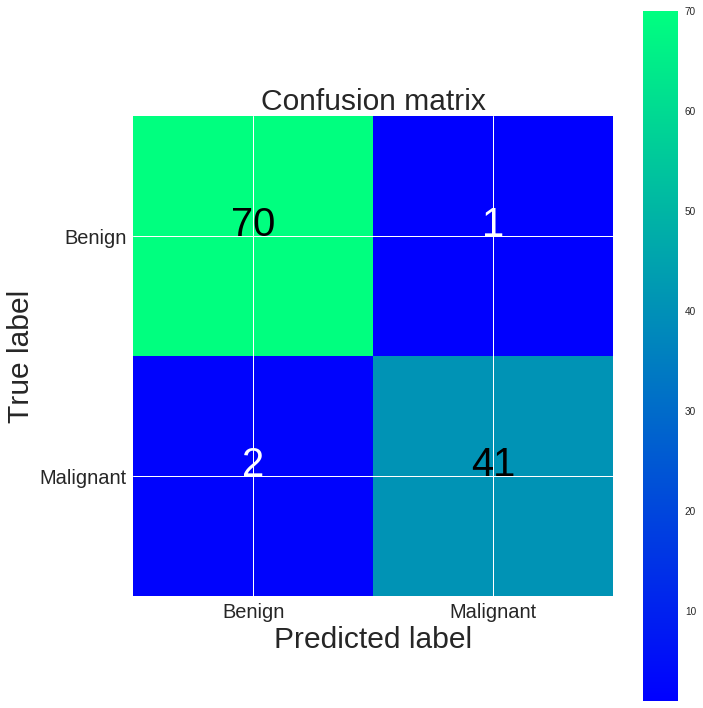

[[70  1]
 [ 2 41]]


In [0]:
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Benign','Malignant'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)